<a href="https://colab.research.google.com/github/aknroshn/Movie-Review-Using-LSTM/blob/main/MOVIE_REVIEW_LSTM(SENTIMENT_ANALYSIS).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. SETUP THE DEPENDENCIES AND LOAD DATA SET FROM KAGGLE

In [2]:
#IMPORT LIBRARIES & DEPNDENCIES

!pip install kaggle
import os, json
from zipfile import ZipFile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
# Mount Google Drive

from google.colab import drive
drive.mount('/content/drive')

# Load Kaggle credentials from Google Drive
kaggle_path = "/content/drive/MyDrive/Dataset/kaggle.json"
with open(kaggle_path, "r") as f:
    kaggle_dict = json.load(f)

os.environ["KAGGLE_USERNAME"] = kaggle_dict["username"]
os.environ["KAGGLE_KEY"] = kaggle_dict["key"]


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# 2. DOWNLOAD AND LOAD DATA

!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
with ZipFile("imdb-dataset-of-50k-movie-reviews.zip", "r") as zip_ref:
    zip_ref.extractall()

data = pd.read_csv("IMDB Dataset.csv")

Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
License(s): other
  0% 0.00/25.7M [00:00<?, ?B/s]
100% 25.7M/25.7M [00:00<00:00, 1.12GB/s]


In [5]:
data.shape

(50000, 2)

In [6]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [7]:
data.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [8]:
data["sentiment"].value_counts()

,count
sentiment,
positive,25000
negative,25000


# 2. DATA PREPROCESSING

In [9]:
# Convert sentiment labels

data.replace({"sentiment": {"positive": 1, "negative": 0}}, inplace=True)

/tmp/ipython-input-956443232.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({"sentiment": {"positive": 1, "negative": 0}}, inplace=True)


In [10]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [11]:
data["sentiment"].value_counts()

,count
sentiment,
1,25000
0,25000


In [12]:
# Train-test split

train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

In [13]:
print(train_data.shape)
print(test_data.shape)

(40000, 2)
(10000, 2)


In [14]:
# Tokenize reviews

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_data["review"])

# Padding

X_train = pad_sequences(tokenizer.texts_to_sequences(train_data["review"]), maxlen=200)
X_test = pad_sequences(tokenizer.texts_to_sequences(test_data["review"]), maxlen=200)

Y_train = train_data["sentiment"]
Y_test = test_data["sentiment"]

# 3. LSTM MODEL BUILDING , COMPILE AND TRAIN



In [15]:
#MODEL

model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=200))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation="sigmoid"))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [17]:
#COMPILE MODEL

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [18]:
#TRAINING

model.fit(X_train, Y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 203s 389ms/step - accuracy: 0.7290 - loss: 0.5222 - val_accuracy: 0.8217 - val_loss: 0.4002
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 193s 386ms/step - accuracy: 0.8497 - loss: 0.3647 - val_accuracy: 0.8514 - val_loss: 0.3703
Epoch 3/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 201s 402ms/step - accuracy: 0.8666 - loss: 0.3293 - val_accuracy: 0.8198 - val_loss: 0.4112
Epoch 4/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 193s 386ms/step - accuracy: 0.8904 - loss: 0.2702 - val_accuracy: 0.8501 - val_loss: 0.3518
Epoch 5/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 193s 387ms/step - accuracy: 0.8948 - loss: 0.2576 - val_accuracy: 0.8660 - val_loss: 0.3275


# 4. EVALUATION & METRICS

In [19]:
#MODEL ACCURACY

loss, accuracy = model.evaluate(X_test, Y_test)
print(f"\nTest Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 36s 113ms/step - accuracy: 0.8699 - loss: 0.3102

Test Loss: 0.30694344639778137
Test Accuracy: 0.8744000196456909


In [20]:
# Predict probabilities and classes

y_probs = model.predict(X_test)
y_pred = (y_probs > 0.5).astype(int)

313/313 ━━━━━━━━━━━━━━━━━━━━ 35s 112ms/step


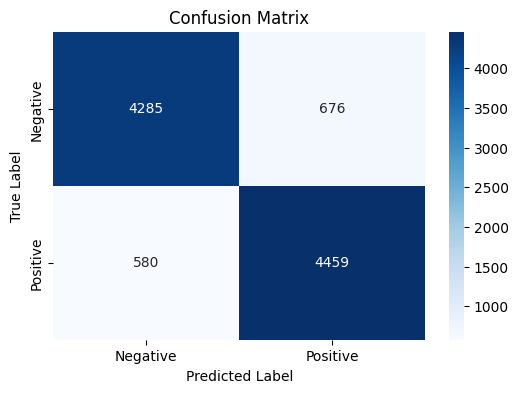

In [21]:
# Confusion Matrix

cm = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [22]:
# Classification Report
print("Classification Report:")
print(classification_report(Y_test, y_pred, target_names=["Negative", "Positive"]))

Classification Report:
              precision    recall  f1-score   support

    Negative       0.88      0.86      0.87      4961
    Positive       0.87      0.88      0.88      5039

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [23]:
# AUC Score
auc_score = roc_auc_score(Y_test, y_probs)
print(f"AUC Score: {auc_score:.4f}")

AUC Score: 0.9428


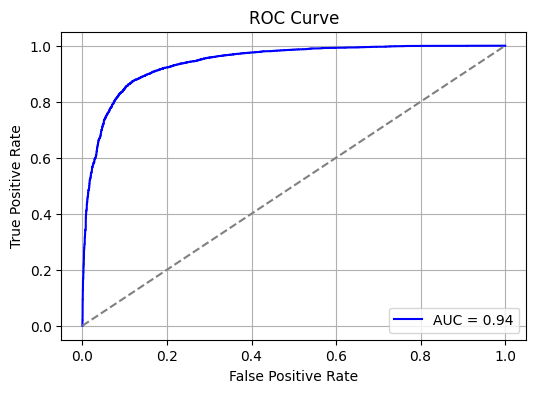

In [24]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(Y_test, y_probs)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}", color="blue")
plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

# 7. PREDICTION

In [25]:
# PREDICTION FUNCTION

def predict_sentiment(review):
    sequence = tokenizer.texts_to_sequences([review])
    padded = pad_sequences(sequence, maxlen=200)
    prob = model.predict(padded)[0][0]
    sentiment = "positive" if prob > 0.5 else "negative"
    return sentiment

In [26]:
# Example usage 1

example_review = "This movie was fantastic. I loved it."
print(f"Review: {example_review}\nPredicted Sentiment: {predict_sentiment(example_review)}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
Review: This movie was fantastic. I loved it.
Predicted Sentiment: positive


In [27]:
# Example usage 2

example_review = "The movie was too slow and boring."
print(f"Review: {example_review}\nPredicted Sentiment: {predict_sentiment(example_review)}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
Review: The movie was too slow and boring.
Predicted Sentiment: negative


In [29]:
# Take user input and predict sentiment

user_review = input("Enter a movie review: ")
predicted_sentiment = predict_sentiment(user_review)
print(f"Review: {user_review}\nPredicted Sentiment: {predicted_sentiment}")

Enter a movie review: it is a well maid movie with strong script
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
Review: it is a well maid movie with strong script
Predicted Sentiment: positive
